<a href="https://colab.research.google.com/github/100mi/titanic_project/blob/master/ti_ta_nic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [0]:
def family_member(col):
  sibsp=col[0]
  parch=col[1]
  sum_member = sibsp + parch + 1
  return sum_member
 

In [103]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test (2).csv
Saving train.csv to train (2).csv


In [0]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [0]:
all_data = pd.concat([train.drop(['Survived'],axis=1),test])
combine_data = [train,test]

In [418]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [419]:
vacant_data = all_data.isnull().sum().sort_values(ascending=False)
total_data = all_data.isnull().count().sort_values(ascending=False)
vacant_percent = (vacant_data/total_data)
missing_df = pd.concat([vacant_data,vacant_percent],axis=1,keys=['Total','Percent'])
missing_df.head()

,Total,Percent
Cabin,1014,0.774637
Age,263,0.200917
Embarked,2,0.001528
Fare,1,0.000764
Ticket,0,0.000000


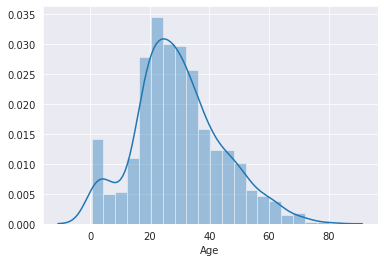

In [420]:
sns.distplot(train['Age'],bins=20)
#hence there are no missing values with -1, or any other value

In [421]:
for dataset in combine_data:
  dataset['family_members']= dataset['SibSp']+dataset['Parch']+1

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_members
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [422]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_members
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


Exploratory Data Analysis

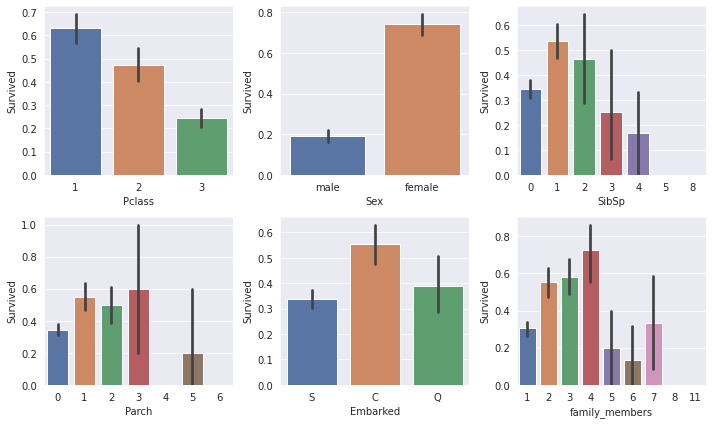

In [423]:
plt.figure(figsize=(10,6))
plt.subplot(231)
sns.barplot('Pclass','Survived',data=train,palette='deep')
plt.subplot(232)
sns.barplot('Sex','Survived',data=train,palette='deep')
plt.subplot(233)
sns.barplot('SibSp','Survived',data=train,palette='deep')
plt.subplot(234)
sns.barplot('Parch','Survived',data=train,palette='deep')
plt.subplot(235)
sns.barplot('Embarked','Survived',data=train,palette='deep')
plt.subplot(236)
sns.barplot('family_members','Survived',data=train,palette='deep')
plt.tight_layout()

**Genral Conclusions:**
1.   Survival rate decreases monotonically as we observe from 
class-1 to calss-2
2.   Overall Females have high survival rate.
3.   Passengers with siblings/spouse around 1 to 3 and Parent/Children around 1 to 3 onboard with them survived.
4.   Passengers embarked from Cherbourg survived more.












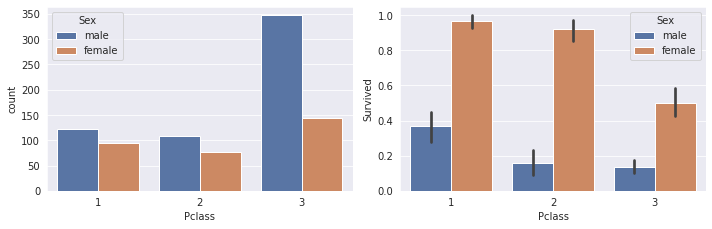

In [424]:
plt.figure(figsize=(10,6))
plt.subplot(221)
sns.countplot('Pclass',data=train,hue='Sex',palette='deep')
plt.subplot(222)
sns.barplot('Pclass','Survived',data=train,hue='Sex',palette='deep')
plt.tight_layout()





*   Nearly all the females from class1 and class2 survived.
*   Males from Pclass-3 have the least survival rate.






Embarked   C   Q    S
Pclass               
1         85   2  127
2         17   3  164
3         66  72  353 



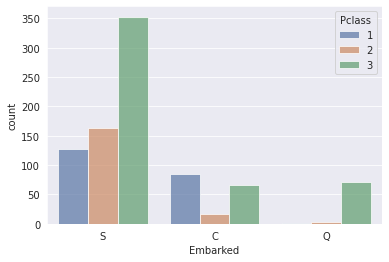

In [425]:
sns.countplot('Embarked',hue='Pclass',data=train,palette='deep',alpha=0.7)
tab = pd.crosstab(train['Pclass'],train['Embarked'])
print(tab,'\n')





*   Most of the Passengers emarked from Cherbourg belongs to passenger class-1 which have high survival rate,thus this exlains our General Prediction-4.
*   Major chunk of Passengers embarked from Southampton belogs to passenger class-3 due to which they have lower survival. 



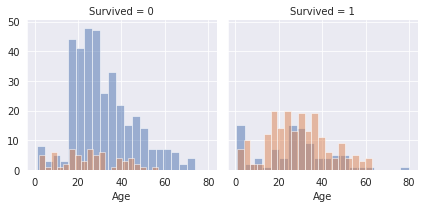

In [426]:
g=sns.FacetGrid(train,col='Survived',hue='Sex',palette='deep')
g.map(plt.hist,'Age',bins=20,alpha=0.5)
# age till 5 have more survival rate. 
# age group of 20-30 didnt survive more.
#as age increases survival rate decreases.

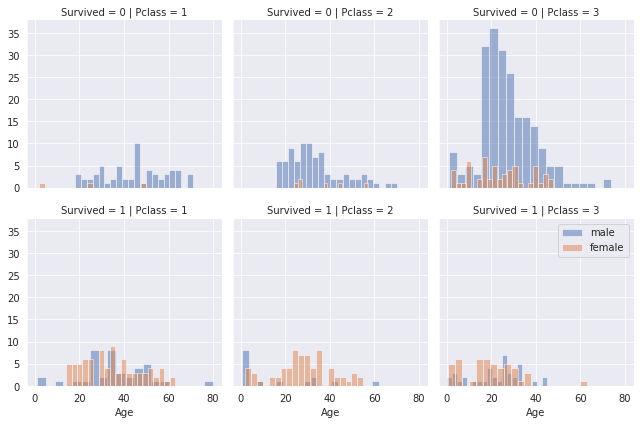

In [427]:
grid=sns.FacetGrid(train,row='Survived',col='Pclass',hue='Sex',palette='deep')
grid.map(plt.hist,'Age',bins=20,alpha=0.5)
plt.legend()
#   CONFORM : that females in all classes have more survival rate
#   MALES from Pclass=3 are mostly didnt survived

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:733: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


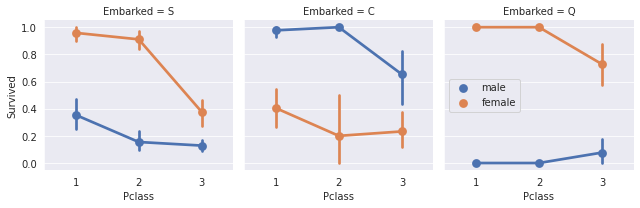

In [428]:
grid=sns.FacetGrid(train,col='Embarked')
grid.map(sns.pointplot,'Pclass','Survived','Sex',palette='deep')
plt.legend()



*   Females Embarked From Southampton and Queenstown have survived more than males.
*    Males Embarked from Cherbourg have survived more.
*    Males from Queenstown and Pclass=3 has survied more wrt other class males.




/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:728: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


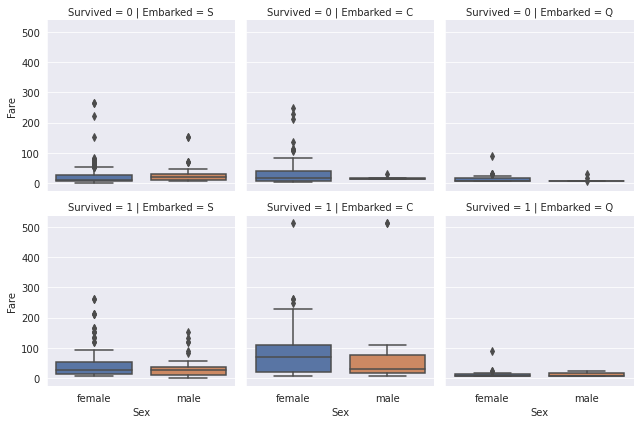

In [429]:
grid=sns.FacetGrid(train,row='Survived',col='Embarked')
grid.map(sns.boxplot,'Sex','Fare',palette='deep')
plt.tight_layout()
# Generally survivals have paid more which correlates to they majorly belongs to Pclass=1.

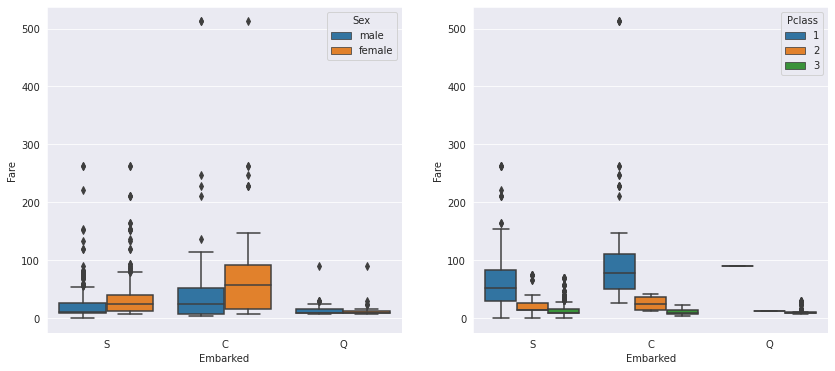

In [430]:
#Variation of Fare with Embarked Placess
plt.figure(figsize=(14 ,6))
plt.subplot(121)
sns.boxplot(y='Fare',x='Embarked',data=train,hue='Sex')
plt.subplot(122)
sns.boxplot(x='Embarked',y='Fare',data=train,hue='Pclass')



*   Survived Passenger have paid more that non-survived as observed in Southampton and Cherbourg, this reflects to our previous General Conclusion(1) that proofs that most survived passengers are mostly females and belongs to upper classes.
*   Fare amount obtained from Females are generally higher that that of Males.
*   Outliers are observed majorly in Southampton and Cherbourg which later on needed to be taken care of.








Steps proceded to obtain Title column.
*   Extracting Titles from Name using `str.extract` attribute which return the string just before '`.`'.
*   Making a list of common titles which occurs more than 20.
*   using common list to over-write Rare titles.
*   Mapping Categorical Titles into Numeric Discrete values using 'Label Encoding'.


In [431]:
# working on Title 
for dataset in combine_data:
  dataset['Title']=dataset['Name'].str.extract('([A-Za-z]+)\.')

#obtaining common title 
common_title = []
for title in train['Title'].unique():
  if train[train['Title'] == title]['Title'].count() > 20:
    common_title.append(title)
print(common_title) 

#using common list to  identify rare titles
def id_rare(cols):
  if cols in common_title:
    return cols 
  else:
    return 'Rare'
for dataset in combine_data:
  dataset['Title']=dataset['Title'].apply(id_rare)  

#mapping categorical into discrete numerical 
title_mapping = {'Mrs':1,'Miss':2,'Master':3,'Mr':4,'Rare':5}
for dataset in combine_data:
  dataset['Title']=dataset['Title'].map(title_mapping)

train.head()

['Mr', 'Mrs', 'Miss', 'Master']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_members,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,4



Converting Categorical 'Sex' feature into Numerical discrete.

*   Male : 0
*   Females : 1



In [0]:
map_sex = {'male':0,'female':1}
for dataset in combine_data:
 dataset['Sex']=dataset['Sex'].map(map_sex)

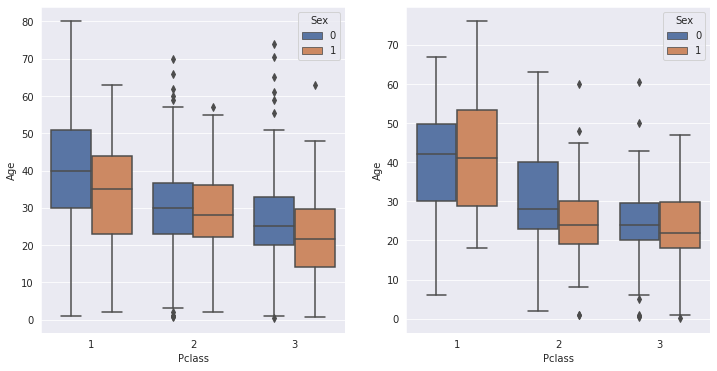

In [433]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.boxplot(x='Pclass',y='Age',data=train,hue='Sex',palette='deep')
plt.subplot(122)
sns.boxplot(x='Pclass',y='Age',data=test,hue='Sex',palette='deep')

In [0]:
for dataset in combine_data:
  dataset['Age']=dataset.groupby(['Sex','Pclass'])['Age'].apply(lambda x : x.fillna(x.median()))

*   As both of the Passenger whose information about Embarked City is missing may be filled with Cherbourg , as most of the passenger from class=1 Embarked from Cherbourg.

In [0]:
train['Embarked']=train["Embarked"].fillna('C')

In [436]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_members,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,2,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2,1




*   Filling the missing value of fare in 'test' data with median value because that passenger belongs to Pclass 3 , which has very low IQR.



In [0]:
fill_fare = test[(test['Pclass']==3)&(test['Sex']==0)]['Fare'].median()
test['Fare']=test['Fare'].fillna(fill_fare)


*   `astype(int)` is used to avoid decimal value.
*   Age is made into ordinal category with Ageband column created.



In [0]:
#reduces complexity
for dataset in combine_data:
  dataset['Age']=dataset['Age'].astype(int)

for dataset in combine_data:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4



Now creating Column which will prrovide wheather a person is travelling alone or not. This will highly depend on ticket frequency because a Passenger might travel with maid friend like Jake Dawson from the movie.

In [0]:
for dataset in combine_data:
  dataset['is_alone']=0
  dataset.loc[dataset['family_members']==1,'is_alone'] = 1

In [440]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_members,Title,is_alone
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,S,2,4,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C85,C,2,1,0


Encoding Embarked cities into numerical nominal category  as:
*   S : 0
*   C : 1
*   Q : 2



In [441]:
map_embarked = {'S':0,'C':1,'Q':2}
for dataset in combine_data:
  dataset['Embarked']=dataset['Embarked'].map(map_embarked)

train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_members,Title,is_alone
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,0,2,4,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C85,1,2,1,0


In [0]:
train = train.drop(['PassengerId','Name','Ticket','Fare','Cabin','SibSp','Parch'],axis=1)
test = test.drop(['PassengerId','Name','Ticket','Fare','Cabin','SibSp','Parch'],axis=1) 

In [443]:
train.head(2)

,Survived,Pclass,Sex,Age,Embarked,family_members,Title,is_alone
0,0,3,0,1,0,2,4,0
1,1,1,1,2,1,2,1,0


Train-Test Split:

In [0]:
X=train.drop('Survived',axis=1)
y=train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

Logistic Regression:

In [449]:
log_model=LogisticRegression()
log_model.fit(X_train,y_train)
log_model_pred = log_model.predict(X_test)
acc_log_model = round(log_model.score(X_train,y_train)*100,2)
print('Accuracy of Logestic Model:',acc_log_model)
print('--*'*10)
print(classification_report(y_test,log_model_pred))
print('--*'*10)
print(confusion_matrix(y_test,log_model_pred))

Accuracy of Logestic Model: 81.54
--*--*--*--*--*--*--*--*--*--*
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       159
           1       0.81      0.72      0.77       109

    accuracy                           0.82       268
   macro avg       0.82      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268

--*--*--*--*--*--*--*--*--*--*
[[141  18]
 [ 30  79]]


Decision tree:

In [450]:
tree_model=DecisionTreeClassifier()
tree_model.fit(X_train,y_train)
tree_model_pred = tree_model.predict(X_test)
acc_tree_model = round(tree_model.score(X_train,y_train)*100,2)
print('Accuracy of tree Model:',acc_tree_model)
print('--*'*10)
print(classification_report(y_test,tree_model_pred))
print('--*'*10)
print(confusion_matrix(y_test,tree_model_pred))

Accuracy of tree Model: 86.84
--*--*--*--*--*--*--*--*--*--*
              precision    recall  f1-score   support

           0       0.77      0.96      0.85       159
           1       0.90      0.59      0.71       109

    accuracy                           0.81       268
   macro avg       0.84      0.77      0.78       268
weighted avg       0.82      0.81      0.80       268

--*--*--*--*--*--*--*--*--*--*
[[152   7]
 [ 45  64]]


Random Forest:

In [451]:
rf_model=LogisticRegression()
rf_model.fit(X_train,y_train)
rf_model_pred = rf_model.predict(X_test)
acc_rf_model = round(rf_model.score(X_train,y_train)*100,2)
print('Accuracy of Random Foresrt Model:',acc_rf_model)
print('--*'*10)
print(classification_report(y_test,rf_model_pred))
print('--*'*10)
print(confusion_matrix(y_test,rf_model_pred))

Accuracy of Random Foresrt Model: 81.54
--*--*--*--*--*--*--*--*--*--*
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       159
           1       0.81      0.72      0.77       109

    accuracy                           0.82       268
   macro avg       0.82      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268

--*--*--*--*--*--*--*--*--*--*
[[141  18]
 [ 30  79]]
